## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  78.217293   467.181910  0.396228   7.234781  1.175037
1  59.633709  1577.365517  0.819745   2.934583  1.484700
2  85.539681   463.377077  0.856743  10.076323  1.323441
3  56.295335   592.552241  0.855594   4.319075  1.458637
4  72.055820   188.915587  0.962583  10.291209  1.207542


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9670370	total: 69.4ms	remaining: 1m 9s
1:	learn: 0.9585828	total: 69.9ms	remaining: 34.9s
2:	learn: 0.9502474	total: 70.4ms	remaining: 23.4s
3:	learn: 0.9420564	total: 70.9ms	remaining: 17.7s
4:	learn: 0.9319141	total: 71.4ms	remaining: 14.2s
5:	learn: 0.9228676	total: 71.9ms	remaining: 11.9s
6:	learn: 0.9138023	total: 72.4ms	remaining: 10.3s
7:	learn: 0.9055476	total: 72.8ms	remaining: 9.03s
8:	learn: 0.8967687	total: 73.3ms	remaining: 8.07s
9:	learn: 0.8890773	total: 73.8ms	remaining: 7.3s
10:	learn: 0.8805429	total: 74.3ms	remaining: 6.68s
11:	learn: 0.8713983	total: 74.8ms	remaining: 6.16s
12:	learn: 0.8641926	total: 75.2ms	remaining: 5.71s
13:	learn: 0.8548306	total: 75.6ms	remaining: 5.32s
14:	learn: 0.8464300	total: 76ms	remaining: 4.99s
15:	learn: 0.8400557	total: 76.6ms	remaining: 4.71s
16:	learn: 0.8328366	total: 77.2ms	remaining: 4.46s
17:	learn: 0.8257931	total: 77.5ms	remaining: 4.23s
18:	learn: 0.8199437	total: 78ms	remaining: 4.0

92:	learn: 0.4547491	total: 109ms	remaining: 1.06s
93:	learn: 0.4517852	total: 110ms	remaining: 1.06s
94:	learn: 0.4490828	total: 110ms	remaining: 1.05s
95:	learn: 0.4457299	total: 111ms	remaining: 1.04s
96:	learn: 0.4428147	total: 111ms	remaining: 1.03s
97:	learn: 0.4401854	total: 112ms	remaining: 1.03s
98:	learn: 0.4375166	total: 112ms	remaining: 1.02s
99:	learn: 0.4342678	total: 113ms	remaining: 1.01s
100:	learn: 0.4314243	total: 113ms	remaining: 1s
101:	learn: 0.4289375	total: 113ms	remaining: 998ms
102:	learn: 0.4255492	total: 114ms	remaining: 991ms
103:	learn: 0.4219869	total: 114ms	remaining: 985ms
104:	learn: 0.4191278	total: 115ms	remaining: 978ms
105:	learn: 0.4162713	total: 115ms	remaining: 970ms
106:	learn: 0.4138838	total: 115ms	remaining: 964ms
107:	learn: 0.4116549	total: 116ms	remaining: 958ms
108:	learn: 0.4088670	total: 116ms	remaining: 951ms
109:	learn: 0.4063419	total: 117ms	remaining: 945ms
110:	learn: 0.4035086	total: 117ms	remaining: 940ms
111:	learn: 0.4012194	t

272:	learn: 0.1891270	total: 186ms	remaining: 496ms
273:	learn: 0.1886658	total: 187ms	remaining: 495ms
274:	learn: 0.1881955	total: 187ms	remaining: 494ms
275:	learn: 0.1874688	total: 188ms	remaining: 493ms
276:	learn: 0.1869263	total: 188ms	remaining: 491ms
277:	learn: 0.1864601	total: 189ms	remaining: 490ms
278:	learn: 0.1861946	total: 189ms	remaining: 488ms
279:	learn: 0.1856533	total: 189ms	remaining: 487ms
280:	learn: 0.1850607	total: 190ms	remaining: 486ms
281:	learn: 0.1843778	total: 190ms	remaining: 484ms
282:	learn: 0.1835532	total: 191ms	remaining: 483ms
283:	learn: 0.1828423	total: 191ms	remaining: 482ms
284:	learn: 0.1822383	total: 192ms	remaining: 481ms
285:	learn: 0.1819732	total: 192ms	remaining: 480ms
286:	learn: 0.1810783	total: 193ms	remaining: 478ms
287:	learn: 0.1804330	total: 193ms	remaining: 477ms
288:	learn: 0.1799944	total: 193ms	remaining: 476ms
289:	learn: 0.1795045	total: 194ms	remaining: 475ms
290:	learn: 0.1793036	total: 195ms	remaining: 476ms
291:	learn: 

511:	learn: 0.0921536	total: 291ms	remaining: 277ms
512:	learn: 0.0917072	total: 291ms	remaining: 276ms
513:	learn: 0.0916171	total: 292ms	remaining: 276ms
514:	learn: 0.0913242	total: 292ms	remaining: 275ms
515:	learn: 0.0911595	total: 293ms	remaining: 274ms
516:	learn: 0.0908995	total: 293ms	remaining: 274ms
517:	learn: 0.0907376	total: 293ms	remaining: 273ms
518:	learn: 0.0903054	total: 294ms	remaining: 272ms
519:	learn: 0.0902184	total: 294ms	remaining: 272ms
520:	learn: 0.0900199	total: 295ms	remaining: 271ms
521:	learn: 0.0898605	total: 295ms	remaining: 270ms
522:	learn: 0.0895054	total: 296ms	remaining: 270ms
523:	learn: 0.0893780	total: 296ms	remaining: 269ms
524:	learn: 0.0889852	total: 297ms	remaining: 268ms
525:	learn: 0.0888298	total: 297ms	remaining: 268ms
526:	learn: 0.0887592	total: 297ms	remaining: 267ms
527:	learn: 0.0884376	total: 298ms	remaining: 266ms
528:	learn: 0.0881632	total: 298ms	remaining: 266ms
529:	learn: 0.0880397	total: 299ms	remaining: 265ms
530:	learn: 

692:	learn: 0.0573873	total: 368ms	remaining: 163ms
693:	learn: 0.0571488	total: 369ms	remaining: 163ms
694:	learn: 0.0570795	total: 369ms	remaining: 162ms
695:	learn: 0.0568633	total: 370ms	remaining: 161ms
696:	learn: 0.0567078	total: 370ms	remaining: 161ms
697:	learn: 0.0566400	total: 370ms	remaining: 160ms
698:	learn: 0.0564297	total: 371ms	remaining: 160ms
699:	learn: 0.0563388	total: 371ms	remaining: 159ms
700:	learn: 0.0562025	total: 372ms	remaining: 159ms
701:	learn: 0.0559974	total: 372ms	remaining: 158ms
702:	learn: 0.0559148	total: 373ms	remaining: 157ms
703:	learn: 0.0558337	total: 373ms	remaining: 157ms
704:	learn: 0.0556297	total: 373ms	remaining: 156ms
705:	learn: 0.0555498	total: 374ms	remaining: 156ms
706:	learn: 0.0554642	total: 374ms	remaining: 155ms
707:	learn: 0.0552398	total: 374ms	remaining: 154ms
708:	learn: 0.0550453	total: 375ms	remaining: 154ms
709:	learn: 0.0549126	total: 375ms	remaining: 153ms
710:	learn: 0.0548317	total: 376ms	remaining: 153ms
711:	learn: 

935:	learn: 0.0316103	total: 472ms	remaining: 32.3ms
936:	learn: 0.0314697	total: 473ms	remaining: 31.8ms
937:	learn: 0.0313743	total: 473ms	remaining: 31.3ms
938:	learn: 0.0312563	total: 474ms	remaining: 30.8ms
939:	learn: 0.0311405	total: 474ms	remaining: 30.3ms
940:	learn: 0.0310402	total: 475ms	remaining: 29.8ms
941:	learn: 0.0309471	total: 475ms	remaining: 29.3ms
942:	learn: 0.0308387	total: 476ms	remaining: 28.7ms
943:	learn: 0.0307490	total: 476ms	remaining: 28.2ms
944:	learn: 0.0306151	total: 476ms	remaining: 27.7ms
945:	learn: 0.0305032	total: 477ms	remaining: 27.2ms
946:	learn: 0.0303410	total: 477ms	remaining: 26.7ms
947:	learn: 0.0302436	total: 477ms	remaining: 26.2ms
948:	learn: 0.0301384	total: 478ms	remaining: 25.7ms
949:	learn: 0.0300428	total: 478ms	remaining: 25.2ms
950:	learn: 0.0299841	total: 479ms	remaining: 24.7ms
951:	learn: 0.0298960	total: 479ms	remaining: 24.2ms
952:	learn: 0.0298093	total: 480ms	remaining: 23.6ms
953:	learn: 0.0297760	total: 480ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

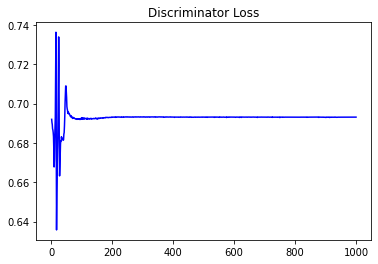

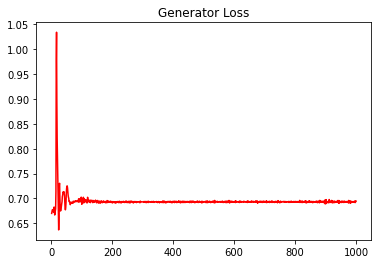

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.6846468173072985


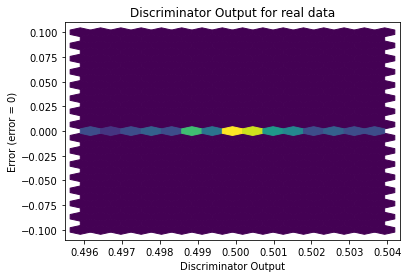

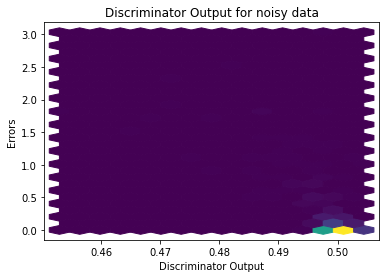

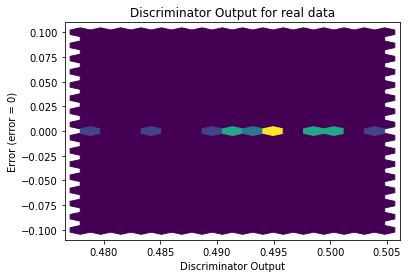

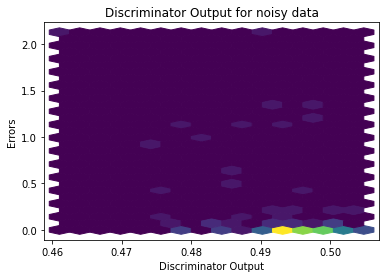

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


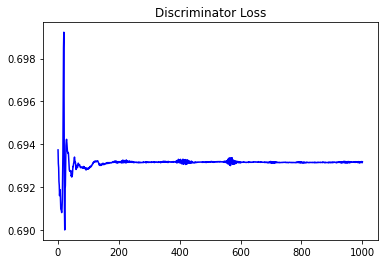

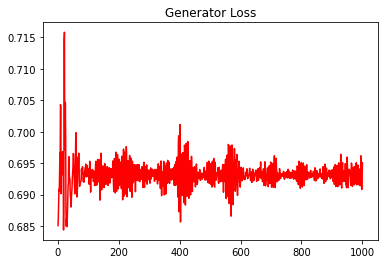

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.7147547927156627


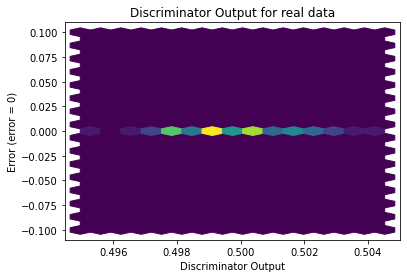

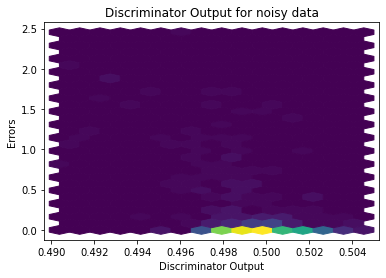

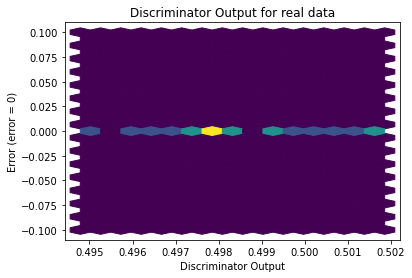

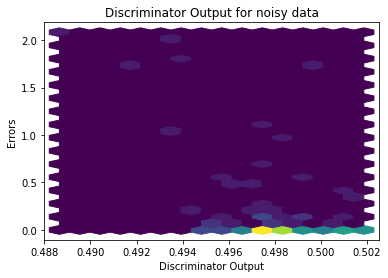

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1706]], requires_grad=True)
